#**Purchases**
##Purpose:
1. Clustering
2. Forecasting

##Details:

*   I took a 1 year window of datasets (from August 2021 to August 2022).
*   In this notebook (1.Cleaning_EDA.ipynb) I showcase the methodology for the cleaning and EDA process.



# Requirements

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from google.colab import drive
import os
from scipy.stats import mstats
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [28]:
pd.set_option('display.max_columns', None)

# Data Review and Cleaning

In [29]:
#import data, join all files and modify columns that don't match general format
drive.mount('/content/drive/')
folder_path = '/content/drive/MyDrive/Globant/Data/'
files = glob.glob(os.path.join(folder_path, '*.xls'))
df = pd.DataFrame()
for i in files:
    df_temp = pd.read_excel(i)
    df_temp.columns = df_temp.columns.str.upper().str.replace('DIRECTORATES','DIRECTORATE')
    df = pd.concat([df, df_temp], ignore_index=True)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [30]:
df.columns

Index(['TRANS DATE', 'TRANS TAX DESC', 'ORIGINAL GROSS AMT', 'ORIGINAL CUR',
       'MERCHANT NAME', 'MERCHANT TAX REG NO', 'MCC CODE', 'CARD NUMBER',
       'BILLING CUR CODE', 'TRANS CAC CODE 1', 'TRANS CAC DESC 1',
       'TRANS CAC CODE 2', 'TRANS CAC DESC 2', 'TRANS CAC CODE 3',
       'TRANS CAC DESC 3', 'DIRECTORATE', 'BILLING GROSS AMT',
       'TRANS TAX RATE', 'TRANS TAX AMT', 'TRANS ORIGINAL NET AMT',
       'TRANS CAC CODE 4', 'TRANS CAC DESC 4', 'TRANS CAC CODE 5',
       'TRANS CAC DESC 5', 'TRANS CAC CODE 6', 'TRANS CAC DESC 6',
       'TRANS CAC CODE 7', 'TRANS CAC DESC 7', 'TRANS CAC CODE 8',
       'TRANS CAC DESC 8', 'TRANS CAC CODE 9', 'TRANS CAC DESC 9',
       'TRANS CAC CODE 10', 'TRANS CAC DESC 10', 'TRANS CAC CODE 11',
       'TRANS CAC DESC 11', 'TRANS CAC CODE 12', 'TRANS CAC DESC 12',
       'TRANS ACCOUNT KEY ', 'TRANS ACCOUNT KEY DESC', 'CLAIM NO',
       'CLAIM NAME', 'TRANS EXPENSE CATEGORY', 'SPLIT EXPENSE CATEGORY',
       'SPLIT UNIT COST', 'SPLIT QUA

In [31]:
df.head()

,TRANS DATE,TRANS TAX DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,MERCHANT NAME,MERCHANT TAX REG NO,MCC CODE,CARD NUMBER,BILLING CUR CODE,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,TRANS CAC DESC 3,DIRECTORATE,BILLING GROSS AMT,TRANS TAX RATE,TRANS TAX AMT,TRANS ORIGINAL NET AMT,TRANS CAC CODE 4,TRANS CAC DESC 4,TRANS CAC CODE 5,TRANS CAC DESC 5,TRANS CAC CODE 6,TRANS CAC DESC 6,TRANS CAC CODE 7,TRANS CAC DESC 7,TRANS CAC CODE 8,TRANS CAC DESC 8,TRANS CAC CODE 9,TRANS CAC DESC 9,TRANS CAC CODE 10,TRANS CAC DESC 10,TRANS CAC CODE 11,TRANS CAC DESC 11,TRANS CAC CODE 12,TRANS CAC DESC 12,TRANS ACCOUNT KEY,TRANS ACCOUNT KEY DESC,CLAIM NO,CLAIM NAME,TRANS EXPENSE CATEGORY,SPLIT EXPENSE CATEGORY,SPLIT UNIT COST,SPLIT QUANTITY
0,2021-08-05,VR,45.64,GBP,costco pfs,NaN,5542.0,************6208,GBP,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,NaN,NaN,ADULT SOCIAL CARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-18,VR,53.55,GBP,costco pfs,NaN,5542.0,************6208,GBP,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,NaN,NaN,ADULT SOCIAL CARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-26,VR,58.85,GBP,costco pfs,NaN,5542.0,************6208,GBP,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,NaN,NaN,ADULT SOCIAL CARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-10,VR,82.51,GBP,vauxhall road fuel exp,NaN,5541.0,************8738,GBP,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,A00,No Further Budget,ADULT SOCIAL CARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-23,VR,85.30,GBP,vauxhall road fuel exp,NaN,5541.0,************8738,GBP,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,A00,No Further Budget,ADULT SOCIAL CARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.shape[0]

49197

In [33]:
#Check which columns have NANS
df.isna().sum()

TRANS DATE                    0
TRANS TAX DESC              695
ORIGINAL GROSS AMT            0
ORIGINAL CUR                  0
MERCHANT NAME                 0
MERCHANT TAX REG NO       48762
MCC CODE                  47130
CARD NUMBER                   0
BILLING CUR CODE              0
TRANS CAC CODE 1            100
TRANS CAC DESC 1          14781
TRANS CAC CODE 2            550
TRANS CAC DESC 2          19729
TRANS CAC CODE 3           8030
TRANS CAC DESC 3          38261
DIRECTORATE                   0
BILLING GROSS AMT          2067
TRANS TAX RATE            24049
TRANS TAX AMT              9362
TRANS ORIGINAL NET AMT    15813
TRANS CAC CODE 4          29415
TRANS CAC DESC 4          48584
TRANS CAC CODE 5          29443
TRANS CAC DESC 5          48602
TRANS CAC CODE 6          29441
TRANS CAC DESC 6          48602
TRANS CAC CODE 7          29437
TRANS CAC DESC 7          48602
TRANS CAC CODE 8          29449
TRANS CAC DESC 8          48602
TRANS CAC CODE 9          49197
TRANS CA

In [34]:
#Remove observations that have NANs on columns that should not have NANs (TRANS DATE, MERCHANT NAME, CARD_NUMBER...)
df = df[~df['TRANS DATE'].isna()]
df = df[~df['MERCHANT NAME'].isna()]
df = df[~df['CARD NUMBER'].isna()]
df.shape[0]

49197

In [35]:
df.dtypes

TRANS DATE                datetime64[ns]
TRANS TAX DESC                    object
ORIGINAL GROSS AMT               float64
ORIGINAL CUR                      object
MERCHANT NAME                     object
MERCHANT TAX REG NO               object
MCC CODE                         float64
CARD NUMBER                       object
BILLING CUR CODE                  object
TRANS CAC CODE 1                  object
TRANS CAC DESC 1                  object
TRANS CAC CODE 2                  object
TRANS CAC DESC 2                  object
TRANS CAC CODE 3                  object
TRANS CAC DESC 3                  object
DIRECTORATE                       object
BILLING GROSS AMT                float64
TRANS TAX RATE                   float64
TRANS TAX AMT                    float64
TRANS ORIGINAL NET AMT           float64
TRANS CAC CODE 4                  object
TRANS CAC DESC 4                  object
TRANS CAC CODE 5                  object
TRANS CAC DESC 5                  object
TRANS CAC CODE 6

In [36]:
df.isna().sum()

TRANS DATE                    0
TRANS TAX DESC              695
ORIGINAL GROSS AMT            0
ORIGINAL CUR                  0
MERCHANT NAME                 0
MERCHANT TAX REG NO       48762
MCC CODE                  47130
CARD NUMBER                   0
BILLING CUR CODE              0
TRANS CAC CODE 1            100
TRANS CAC DESC 1          14781
TRANS CAC CODE 2            550
TRANS CAC DESC 2          19729
TRANS CAC CODE 3           8030
TRANS CAC DESC 3          38261
DIRECTORATE                   0
BILLING GROSS AMT          2067
TRANS TAX RATE            24049
TRANS TAX AMT              9362
TRANS ORIGINAL NET AMT    15813
TRANS CAC CODE 4          29415
TRANS CAC DESC 4          48584
TRANS CAC CODE 5          29443
TRANS CAC DESC 5          48602
TRANS CAC CODE 6          29441
TRANS CAC DESC 6          48602
TRANS CAC CODE 7          29437
TRANS CAC DESC 7          48602
TRANS CAC CODE 8          29449
TRANS CAC DESC 8          48602
TRANS CAC CODE 9          49197
TRANS CA

## Categorical Variables

In [37]:
#I check the unique values of the categorical columns
#I'm not taking into account all columns given that some of them are mostly empty
for i in ['TRANS TAX DESC', 'ORIGINAL CUR', 'BILLING CUR CODE',
         'TRANS CAC CODE 1', 'TRANS CAC DESC 1', 'TRANS CAC CODE 2', 'TRANS CAC DESC 2',
          'DIRECTORATE']:
    print(i)
    print(df[i].unique())
    print('\n')

TRANS TAX DESC
['VR' 'VZ' 'VL' nan 'VT' '0 Percent' 'VF' 'VE' '12.5%' 'VS']


ORIGINAL CUR
['GBP' 'AUD' 'USD' 'EUR' 'RUB' 'PKR' 'PLN' 'KRW' 'CAD' 'DKK' 'NOK']


BILLING CUR CODE
['GBP']


TRANS CAC CODE 1
['K020' 'L9Y0' 'L220' 'L100' 'L680' 'L700' 'L300' 'X0A0' 'MC70' 'L670'
 'L110' 'L0G0' 'L120' 'L000' 'L410' 'K050' 'L880' 'L080' 'M900' 'L750'
 'K200' 'K170' 'K080' 'L0L0' 'L6E0' 'J250' 'L420' 'MA20' 'H2T0' 'L800'
 'L5L0' 'L030' 'K110' 'K300' 'K210' 'H400' 'J030' 'J200' 'J280' 'J210'
 'L4H0' 'H0R0' 'L0F0' 'J310' 'J550' 'K600' 'J500' 'H000' 'K240' 'L0J0'
 'N070' nan 'M000' 'TA02154-01 ' 'L5H0' 'P180' 'H220' 'H240' 'L5F0' 'J050'
 'L810' 'J560' 'M227' 'J300' 'J100' 'L690' 'H0T0' 'K260' 'L180' 'L310'
 'J3A0' 'J040' 'L540' 'L270' 'J1A0' 'J760' 'L250' 'L0M0' 'N0B0' 'H2Q0'
 'L990' 'J240' 'J700' 'L5R0' 'J010' 'J0D0' 'L570' 'K310' 'L6C0' 'N1H0'
 'L5J0' 'L510' 'L130' '1CJ0' 'H090' 'K030' 'L5A0' 'MCK0' 'MCJ0' 'L5G0'
 'L5D0' 'M980' 'N060' 'H0M0' 'P060' 'B1' 'N1' 'N2']


TRANS CAC DESC 1
['Vehicle 

In [38]:
#I will keep the top 30 categories for 'TRANS CAC DESC 1'
df['TRANS CAC DESC 1'].value_counts()[0:30]

TRANS CAC DESC 1
Equip Operational          7582
Birmingham City Council    5404
Vehicle Fuel               3254
Purchases Food             2521
Mat'l Raw/Drct             1733
Supplies & Sev Mic         1444
Transport Misc             1398
Conference Fees Subs UK    1126
Books                       905
Computing Other             776
Equip Other                 710
Electricity                 536
Vehicle Excise Lics         476
Bldg RM Departmental        469
Phon NonCentrx Lines        418
Stationery                  416
Postage                     398
Hospitality                 398
Water Services              344
Training Other              323
Vehicle OthrunCosts         310
Prof Fees other             284
Other Fix&Fittings          255
Travel Taxis                209
Oth Indirect EmpExps        208
Subscriptions               191
In Year Credits             185
Other Services              171
Travel Bus/Rail             169
Clothing&Uniforms           156
Name: count, dtype: int

In [39]:
df['TRANS CAC DESC 1'].value_counts()[0:30].index

Index(['Equip Operational', 'Birmingham City Council', 'Vehicle Fuel',
       'Purchases Food', 'Mat'l Raw/Drct', 'Supplies & Sev Mic',
       'Transport Misc', 'Conference Fees Subs UK', 'Books', 'Computing Other',
       'Equip Other', 'Electricity', 'Vehicle Excise Lics',
       'Bldg RM Departmental', 'Phon NonCentrx Lines', 'Stationery', 'Postage',
       'Hospitality', 'Water Services', 'Training Other',
       'Vehicle OthrunCosts', 'Prof Fees other', 'Other Fix&Fittings',
       'Travel Taxis', 'Oth Indirect EmpExps', 'Subscriptions',
       'In Year Credits', 'Other Services', 'Travel Bus/Rail',
       'Clothing&Uniforms'],
      dtype='object', name='TRANS CAC DESC 1')

In [14]:
df['TRANS CAC DESC 1'] = np.where(df['TRANS CAC DESC 1'].isin(df['TRANS CAC DESC 1'].value_counts()[0:30].index), df['TRANS CAC DESC 1'], 'other')

In [15]:
# In this cell I am cleaning the other categorical columns
#For TRANS TAX DESC I group some categories
df['TRANS TAX DESC'] = np.where(df['TRANS TAX DESC'].isin(['0 Percent','6.1 Percent','12.5%']),'Percentage', df['TRANS TAX DESC'])
#Fill nan with 'other' category
df['TRANS TAX DESC'] = df['TRANS TAX DESC'].fillna('OTHER')
df['DIRECTORATE'] = df['DIRECTORATE'].str.upper().str.replace('&', 'AND').str.replace('SERVICES ', 'SERVICES').str.replace('GOVENANCE', 'GOVERNANCE').str.replace('GROWTH ', 'GROWTH')

## Numerical Columns

In [16]:
df.columns

Index(['TRANS DATE', 'TRANS TAX DESC', 'ORIGINAL GROSS AMT', 'ORIGINAL CUR',
       'MERCHANT NAME', 'MERCHANT TAX REG NO', 'MCC CODE', 'CARD NUMBER',
       'BILLING CUR CODE', 'TRANS CAC CODE 1', 'TRANS CAC DESC 1',
       'TRANS CAC CODE 2', 'TRANS CAC DESC 2', 'TRANS CAC CODE 3',
       'TRANS CAC DESC 3', 'DIRECTORATE', 'BILLING GROSS AMT',
       'TRANS TAX RATE', 'TRANS TAX AMT', 'TRANS ORIGINAL NET AMT',
       'TRANS CAC CODE 4', 'TRANS CAC DESC 4', 'TRANS CAC CODE 5',
       'TRANS CAC DESC 5', 'TRANS CAC CODE 6', 'TRANS CAC DESC 6',
       'TRANS CAC CODE 7', 'TRANS CAC DESC 7', 'TRANS CAC CODE 8',
       'TRANS CAC DESC 8', 'TRANS CAC CODE 9', 'TRANS CAC DESC 9',
       'TRANS CAC CODE 10', 'TRANS CAC DESC 10', 'TRANS CAC CODE 11',
       'TRANS CAC DESC 11', 'TRANS CAC CODE 12', 'TRANS CAC DESC 12',
       'TRANS ACCOUNT KEY ', 'TRANS ACCOUNT KEY DESC', 'CLAIM NO',
       'CLAIM NAME', 'TRANS EXPENSE CATEGORY', 'SPLIT EXPENSE CATEGORY',
       'SPLIT UNIT COST', 'SPLIT QUA

In [17]:
#I check the distribution of numerical columns
#I'm not taking into account all columns given that some of them are mostly empty
df[['ORIGINAL GROSS AMT', 'BILLING GROSS AMT', 'TRANS TAX AMT']].describe()

,ORIGINAL GROSS AMT,BILLING GROSS AMT,TRANS TAX AMT
count,49197.000000,47130.000000,39835.000000
mean,165.642125,141.481383,8.612824
std,2526.666745,619.174971,41.961919
min,-3601.500000,-3601.500000,-209.280000
25%,16.460000,16.320000,0.000000
50%,50.000000,50.000000,0.000000
75%,100.000000,100.000000,7.170000
max,403000.000000,65180.800000,3632.030000


In [18]:
df[['ORIGINAL GROSS AMT', 'TRANS TAX AMT']].isna().sum()

ORIGINAL GROSS AMT       0
TRANS TAX AMT         9362
dtype: int64

In [19]:
#I fill na with zeros
df[['ORIGINAL GROSS AMT', 'TRANS TAX AMT']] = df[['BILLING GROSS AMT', 'TRANS TAX AMT']].fillna(0)

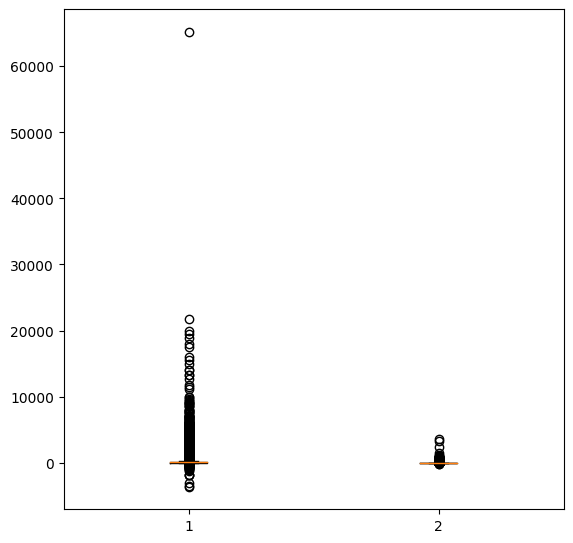

In [20]:
fig = plt.figure(figsize =(5, 5))
ax = fig.add_axes([0, 0, 1, 1])


bp = ax.boxplot(df[['ORIGINAL GROSS AMT', 'TRANS TAX AMT']])

plt.show()

In [21]:
#By the graph we can evidence there are a lot of outliers. I'm not going to remove all outliers but I'm going to remove the top and low 1% percent of observations
df['ORIGINAL GROSS AMT 1'] = mstats.winsorize(df['ORIGINAL GROSS AMT'], limits=[0.01,0.01])
df['TRANS TAX AMT 1'] = mstats.winsorize(df['TRANS TAX AMT'], limits=[0.01,0.01])

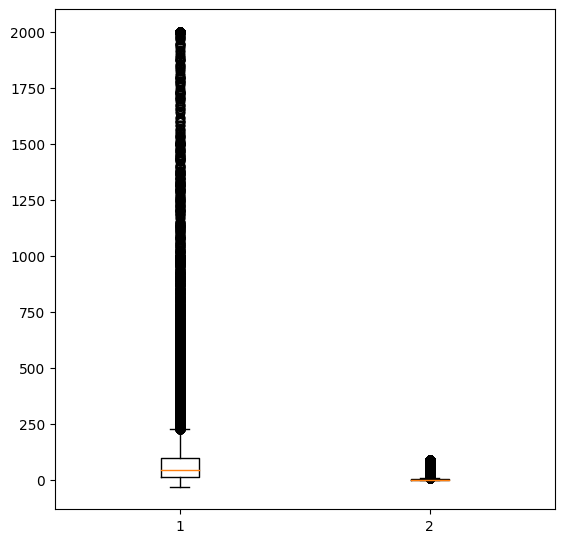

In [22]:
fig = plt.figure(figsize =(5, 5))
ax = fig.add_axes([0, 0, 1, 1])


bp = ax.boxplot(df[['ORIGINAL GROSS AMT 1', 'TRANS TAX AMT 1']])

plt.show()

After reviewing the categories, my decisions are:

*   Take into account just the top 30 categories for TRANS CAC DESC 1
* Use DIRECTORATE variable after decreasing the number of categories
* Even when TRANS CAC CODE 1 has the less amount of codes, I reduced it even more by just taking the the first letter of each code.
* DIRECTORATE column was cleaned, there were categories such as 'Finance and Governance' and 'Finance and Govenance'
* The only numerical columns that I'm going to use are ORIGINAL GROSS AMT AMT and TRANS TAX AMT. I replaced the top and low 1% in order to get rid of the biggest outliers. This removal of outliers doesn't apply to the Anomaly Detection

In [22]:
# I save the clean data
df[['TRANS DATE', 'TRANS TAX DESC', 'ORIGINAL CUR', 'DIRECTORATE',
    'TRANS CAC DESC 1',  'ORIGINAL GROSS AMT 1', 'TRANS TAX AMT 1',
    'ORIGINAL GROSS AMT', 'TRANS TAX AMT', 'CARD NUMBER', 'MCC CODE']].to_csv(folder_path+'clean_data.csv', sep ='|', index = False)

In [23]:
df

,TRANS DATE,TRANS TAX DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,MERCHANT NAME,MERCHANT TAX REG NO,MCC CODE,CARD NUMBER,BILLING CUR CODE,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,TRANS CAC DESC 3,DIRECTORATE,BILLING GROSS AMT,TRANS TAX RATE,TRANS TAX AMT,TRANS ORIGINAL NET AMT,TRANS CAC CODE 4,TRANS CAC DESC 4,TRANS CAC CODE 5,TRANS CAC DESC 5,TRANS CAC CODE 6,TRANS CAC DESC 6,TRANS CAC CODE 7,TRANS CAC DESC 7,TRANS CAC CODE 8,TRANS CAC DESC 8,TRANS CAC CODE 9,TRANS CAC DESC 9,TRANS CAC CODE 10,TRANS CAC DESC 10,TRANS CAC CODE 11,TRANS CAC DESC 11,TRANS CAC CODE 12,TRANS CAC DESC 12,TRANS ACCOUNT KEY,TRANS ACCOUNT KEY DESC,CLAIM NO,CLAIM NAME,TRANS EXPENSE CATEGORY,SPLIT EXPENSE CATEGORY,SPLIT UNIT COST,SPLIT QUANTITY,ORIGINAL GROSS AMT 1,TRANS TAX AMT 1
0,2021-08-05,VR,0.00,GBP,costco pfs,NaN,5542.0,************6208,GBP,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,NaN,NaN,ADULT SOCIAL CARE,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0
1,2021-08-18,VR,0.00,GBP,costco pfs,NaN,5542.0,************6208,GBP,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,NaN,NaN,ADULT SOCIAL CARE,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0
2,2021-08-26,VR,0.00,GBP,costco pfs,NaN,5542.0,************6208,GBP,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,NaN,NaN,ADULT SOCIAL CARE,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0
3,2021-08-10,VR,0.00,GBP,vauxhall road fuel exp,NaN,5541.0,************8738,GBP,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,A00,No Further Budget,ADULT SOCIAL CARE,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0
4,2021-08-23,VR,0.00,GBP,vauxhall road fuel exp,NaN,5541.0,************8738,GBP,K020,Vehicle Fuel,RV192,Sparkbrook Resource Centre,A00,No Further Budget,ADULT SOCIAL CARE,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49192,2022-08-31,VZ,59.99,GBP,blinkist,NaN,NaN,************8087,GBP,B1,other,NaN,NaN,NaN,NaN,SCHOOLS,59.99,NaN,0.0,59.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.99,0.0
49193,2022-08-12,VZ,371.80,GBP,amznmktplace,NaN,NaN,************4310,GBP,B1,other,AX00H,NaN,4P00,NaN,SCHOOLS,371.80,NaN,0.0,371.80,ED1,NaN,JZZZZZ,NaN,TV1L0,NaN,JZZZ,NaN,JXXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.80,0.0
49194,2022-08-12,VZ,147.98,GBP,amznmktplace,NaN,NaN,************4310,GBP,B1,other,AX00H,NaN,4P00,NaN,SCHOOLS,147.98,NaN,0.0,147.98,ED1,NaN,JZZZZZ,NaN,TV1L0,NaN,JZZZ,NaN,JXXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.98,0.0
49195,2022-08-24,VZ,69.99,GBP,amznmktplace,NaN,NaN,************4310,GBP,B1,other,AX00H,NaN,4P00,NaN,SCHOOLS,69.99,NaN,0.0,69.99,ED1,NaN,JZZZZZ,NaN,TV1L0,NaN,JZZZ,NaN,JXXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.99,0.0


# EDA





In [24]:
df = df[['TRANS DATE', 'TRANS TAX DESC', 'ORIGINAL CUR', 'DIRECTORATE',
    'TRANS CAC DESC 1',  'ORIGINAL GROSS AMT 1', 'TRANS TAX AMT 1',
    'BILLING GROSS AMT', 'TRANS TAX AMT', 'CARD NUMBER']]

In [25]:
columna = 'DIRECTORATE'
ID = 'CARD NUMBER'
nombre = 'Directorate Count'
data = df[[columna, ID]].groupby([columna]).count().reset_index()
fig = px.bar(data, x=columna, y=ID , barmode='group', title=nombre, text=data[ID], width=1250, height=400,
            color_discrete_sequence=["skyblue"])
fig.update_layout(
yaxis=dict(
title=dict(text='Count')),
plot_bgcolor='rgba(0,0,0,0)',
paper_bgcolor='rgba(0,0,0,0)',
legend=dict(
orientation="h",
entrywidth=90,
yanchor="bottom",
y=1.02,
))
fig.show()

In [26]:
columna = 'TRANS TAX DESC'
ID = 'CARD NUMBER'
nombre = 'Trans Tax Count'
data = df[[columna, ID]].groupby([columna]).count().reset_index()
fig = px.bar(data, x=columna, y=ID , barmode='group', title=nombre, text=data[ID], width=1250, height=400,
            color_discrete_sequence=["skyblue"])
fig.update_layout(
yaxis=dict(
title=dict(text='Count')),
plot_bgcolor='rgba(0,0,0,0)',
paper_bgcolor='rgba(0,0,0,0)',
legend=dict(
orientation="h",
entrywidth=90,
yanchor="bottom",
y=1.02,
))
fig.show()

In [27]:
columna = 'TRANS CAC DESC 1'
ID = 'CARD NUMBER'
nombre = 'Trans Category 1'
data = df[[columna, ID]].groupby([columna]).count().reset_index()
fig = px.bar(data, x=columna, y=ID , barmode='group', title=nombre, text=data[ID], width=1250, height=400,
            color_discrete_sequence=["skyblue"])
fig.update_layout(
yaxis=dict(
title=dict(text='Count')),
plot_bgcolor='rgba(0,0,0,0)',
paper_bgcolor='rgba(0,0,0,0)',
legend=dict(
orientation="h",
entrywidth=90,
yanchor="bottom",
y=1.02,
))
fig.show()

In [28]:
columna = 'ORIGINAL CUR'
ID = 'CARD NUMBER'
nombre = 'Original Transaction Currency'
data = df[[columna, ID]].groupby([columna]).count().reset_index()
fig = px.bar(data, x=columna, y=ID , barmode='group', title=nombre, text=data[ID], width=1250, height=400,
            color_discrete_sequence=["skyblue"])
fig.update_layout(
yaxis=dict(
title=dict(text='Count')),
plot_bgcolor='rgba(0,0,0,0)',
paper_bgcolor='rgba(0,0,0,0)',
legend=dict(
orientation="h",
entrywidth=90,
yanchor="bottom",
y=1.02,
))
fig.show()

In [29]:
fig = px.histogram(df, x="ORIGINAL GROSS AMT 1", title='Total Billing Value Distribution', width=1250, height=400,
            color_discrete_sequence=["skyblue"])
fig.update_layout(
yaxis=dict(
title=dict(text='Count')),
plot_bgcolor='rgba(0,0,0,0)',
paper_bgcolor='rgba(0,0,0,0)',
legend=dict(
orientation="h",
entrywidth=90,
yanchor="bottom",
y=1.02,
))
fig.show()

In [30]:
fig = px.histogram(df, x="TRANS TAX AMT 1", title='Total Tax Value Distribution', width=1250, height=400,
            color_discrete_sequence=["skyblue"])
fig.update_layout(
yaxis=dict(
title=dict(text='Count')),
plot_bgcolor='rgba(0,0,0,0)',
paper_bgcolor='rgba(0,0,0,0)',
legend=dict(
orientation="h",
entrywidth=90,
yanchor="bottom",
y=1.02,
))
fig.show()

# Conclusions


*   Most transactions were done by the School or Neighborhoods dictatorates
*   Most transaction's categories are Equip Operational or Birmingham City Council
* Most transactions have a value between 5 - 20 and also most of them didn't have Tax.
* Transaction's original currency and Tax type don't vary a lot from transaction to transaction. These variables won't add a lot of value for the clustering exercise but will be helpful for the anomaly detection use case

